Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

#### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [18]:
import numpy as np
import pandas as pd

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import prepare as p

In [10]:
df = acquire.get_titanic_data()
df.head()

this file exists, reading csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [11]:
# grab, prepare, and split our data sets
titanic_train, \
titanic_val, \
titanic_test = p.splitting_data(
    p.clean_titanic(a.get_titanic_data()),
    'survived')

this file exists, reading csv


In [12]:
titanic_train.shape, titanic_val.shape, titanic_test.shape

((534, 9), (178, 9), (179, 9))

In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 776 to 768
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  534 non-null    int64  
 1   survived      534 non-null    int64  
 2   pclass        534 non-null    object 
 3   sex           534 non-null    object 
 4   sibsp         534 non-null    int64  
 5   parch         534 non-null    int64  
 6   fare          534 non-null    float64
 7   embark_town   534 non-null    object 
 8   alone         534 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 41.7+ KB


In [15]:
# tidy up the pclass and drop passenger_id:
titanic_train.drop(columns='passenger_id')
titanic_train['pclass'] = titanic_train['pclass'].astype(int)

In [16]:
# encoding sex and embark_town, 
# the only object types we have left:

In [19]:
# lets assign the output of pd.get_dummies into a separate df:
titanic_train_encoded_cats = pd.get_dummies(titanic_train[['embark_town', 'sex']],
              drop_first=True).astype(int)

In [20]:
# glue that back into my original df:
titanic_preprocessed = pd.concat(
    [titanic_train,
    titanic_train_encoded_cats],
    axis=1).drop(columns=['sex', 'embark_town'])

In [21]:
titanic_preprocessed.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,776,0,3,0,0,7.7500,1,1,0,1
829,829,1,1,0,0,80.0000,1,0,1,0
215,215,1,1,1,0,113.2750,0,0,0,0
258,258,1,1,0,0,512.3292,1,0,0,0
129,129,0,3,0,0,6.9750,1,0,1,1


In [22]:
def preprocess_titanic(train_df, val_df, test_df):
    '''
    preprocess_titanic will take in three pandas dataframes
    of our titanic data, expected as cleaned versions of this 
    titanic data set (see documentation on acquire.py and prepare.py)
    
    output:
    encoded, ML-ready versions of our clean data, with 
    columns sex and embark_town encoded in the one-hot fashion
    return: (pd.DataFrame, pd.DataFrame, pd.DataFrame)
    '''
    # with a looping structure:
    # for df in [train_df, val_df, test_df]:
    #     df.drop(blah blah blah)
    #     df['pclass'] = df['pclass'].astype(int)
    train_df = train_df.drop(columns='passenger_id')
    train_df['pclass'] = train_df['pclass'].astype(int)
    val_df = val_df.drop(columns='passenger_id')
    val_df['pclass'] = val_df['pclass'].astype(int)
    test_df = test_df.drop(columns='passenger_id')
    test_df['pclass'] = test_df['pclass'].astype(int)
    encoding_var = ['sex', 'embark_town']
    encoded_dfs = []
    for df in [train_df, val_df, test_df]:
        df_encoded_cats = pd.get_dummies(
            df[['embark_town', 'sex']],
              drop_first=True).astype(int)
        encoded_dfs.append(pd.concat(
            [df,
            df_encoded_cats],
            axis=1).drop(columns=['sex', 'embark_town']))
    return encoded_dfs


In [23]:
ttrain_encoded, tval_encoded, ttest_encoded = preprocess_titanic(
    titanic_train, 
    titanic_val, 
    titanic_test)

In [24]:
ttrain_encoded.head()

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,0,3,0,0,7.7500,1,1,0,1
829,1,1,0,0,80.0000,1,0,1,0
215,1,1,1,0,113.2750,0,0,0,0
258,1,1,0,0,512.3292,1,0,0,0
129,0,3,0,0,6.9750,1,0,1,1


## From Lesson

In [1]:
# lets make a decision tree neat cool awesome I love it
# custom modules for data prep:
import acquire as a
import prepare as p
# tabular manipulation
import numpy as np
import pandas as pd
# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree

In [4]:
def preprocess_titanic(train_df, val_df, test_df):
    '''
    preprocess_titanic will take in three pandas dataframes
    of our titanic data, expected as cleaned versions of this 
    titanic data set (see documentation on acquire.py and prepare.py)
    
    output:
    encoded, ML-ready versions of our clean data, with 
    columns sex and embark_town encoded in the one-hot fashion
    return: (pd.DataFrame, pd.DataFrame, pd.DataFrame)
    '''
    # with a looping structure:
    # for df in [train_df, val_df, test_df]:
    #     df.drop(blah blah blah)
    #     df['pclass'] = df['pclass'].astype(int)
    train_df = train_df.drop(columns='passenger_id')
    train_df['pclass'] = train_df['pclass'].astype(int)
    val_df = val_df.drop(columns='passenger_id')
    val_df['pclass'] = val_df['pclass'].astype(int)
    test_df = test_df.drop(columns='passenger_id')
    test_df['pclass'] = test_df['pclass'].astype(int)
    encoding_var = ['sex', 'embark_town']
    encoded_dfs = []
    for df in [train_df, val_df, test_df]:
        df_encoded_cats = pd.get_dummies(
            df[['embark_town', 'sex']],
              drop_first=True).astype(int)
        encoded_dfs.append(pd.concat(
            [df,
            df_encoded_cats],
            axis=1).drop(columns=['sex', 'embark_town']))
    return encoded_dfs

In [5]:
# grabbing, cleaning, preprocessing our data:

In [7]:
train, val, test = p.splitting_data(
    p.clean_titanic(a.get_titanic_data()),
                   'survived')

this file exists, reading csv


In [8]:
train_encoded, val_encoded, test_encoded = preprocess_titanic(
train, val, test)

In [9]:
# model ready dataset:
# all nums, no Objects:
train_encoded.head()

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
776,0,3,0,0,7.7500,1,1,0,1
829,1,1,0,0,80.0000,1,0,1,0
215,1,1,1,0,113.2750,0,0,0,0
258,1,1,0,0,512.3292,1,0,0,0
129,0,3,0,0,6.9750,1,0,1,1


In [10]:
X_train, y_train = train_encoded.drop(columns='survived'), \
train_encoded.survived

In [11]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'embark_town_Queenstown',
       'embark_town_Southampton', 'sex_male'],
      dtype='object')

In [13]:
y_train.head()

776    0
829    1
215    1
258    1
129    0
Name: survived, dtype: int64

 ### Side note: It is expected that I have done exploration before this!!! The exploration is going to be as if not more important than our modeling!! (AND THEY RELATE DIRECTLY TO EACHOTHER)

In [14]:
# creating the model!
# SKLEARN PROCESS:
# invoke/create a variable that holds an object:
# make the thing:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [15]:
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [16]:
# fit the thing
# NOTE: ONLY DO THIS STEP ON TRAIN.
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [19]:
# use the thing!
# now that clf is fit, use it to predict!
clf.predict(X_train)[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [21]:
# before we proceed, lets create a baseline prediction:
# we do this by making a blanket prediction of the majority class
train_encoded.survived.value_counts()

survived
0    329
1    205
Name: count, dtype: int64

In [22]:
# lets make a predictions dataframe to hold
# y_true: the actual values of our target
# baseline: the blanket all-zero survival prediction
# a new column for any model we create
# so we can compare them all to eachother :)

In [23]:
y_pred = pd.DataFrame({
    'y_true': y_train.values,
    'baseline':0,
    'dt_one': clf.predict(X_train)
}, index=train_encoded.index)

In [25]:
y_pred.head(2)

,y_true,baseline,dt_one
776,0,0,0
829,1,0,1


In [27]:
# now that we have these organized here:
# lets compare what the baseline is doing
# and what the model is doing:
# we pulled in accuracy score from sklearn:
baseline_acc = accuracy_score(y_pred.y_true, y_pred.baseline)

In [29]:
baseline_acc

0.6161048689138576

In [28]:
y_val_pred = pd.DataFrame({
    'y_true': val_encoded.survived,
    'baseline':0,
    'dt_one': clf.predict(val_encoded.drop(columns='survived'))
}, index=val_encoded.index)

In [30]:
# how good is that first model, exactly?

In [32]:
# how good is our first model?
accuracy_score(y_pred.y_true, y_pred.dt_one)

0.8146067415730337

In [33]:
# we have approximately 81% accuracy on our first model
# compared to what baseline said. Its doing something! Huzah!
accuracy_score(y_val_pred.y_true, y_val_pred.dt_one)

0.7865168539325843

In [36]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'embark_town_Queenstown',
       'embark_town_Southampton', 'sex_male'],
      dtype='object')

In [37]:
features = X_train.columns.to_list()

In [39]:
print(export_text(clf, feature_names=features))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 22.00
|   |   |   |--- class: 1
|   |   |--- fare >  22.00
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.91
|   |   |   |--- class: 1
|   |   |--- fare >  23.91
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 26.27
|   |   |--- parch <= 0.50
|   |   |   |--- class: 0
|   |   |--- parch >  0.50
|   |   |   |--- class: 0
|   |--- fare >  26.27
|   |   |--- sibsp <= 2.50
|   |   |   |--- class: 0
|   |   |--- sibsp >  2.50
|   |   |   |--- class: 0



In [42]:
import matplotlib.pyplot as plt

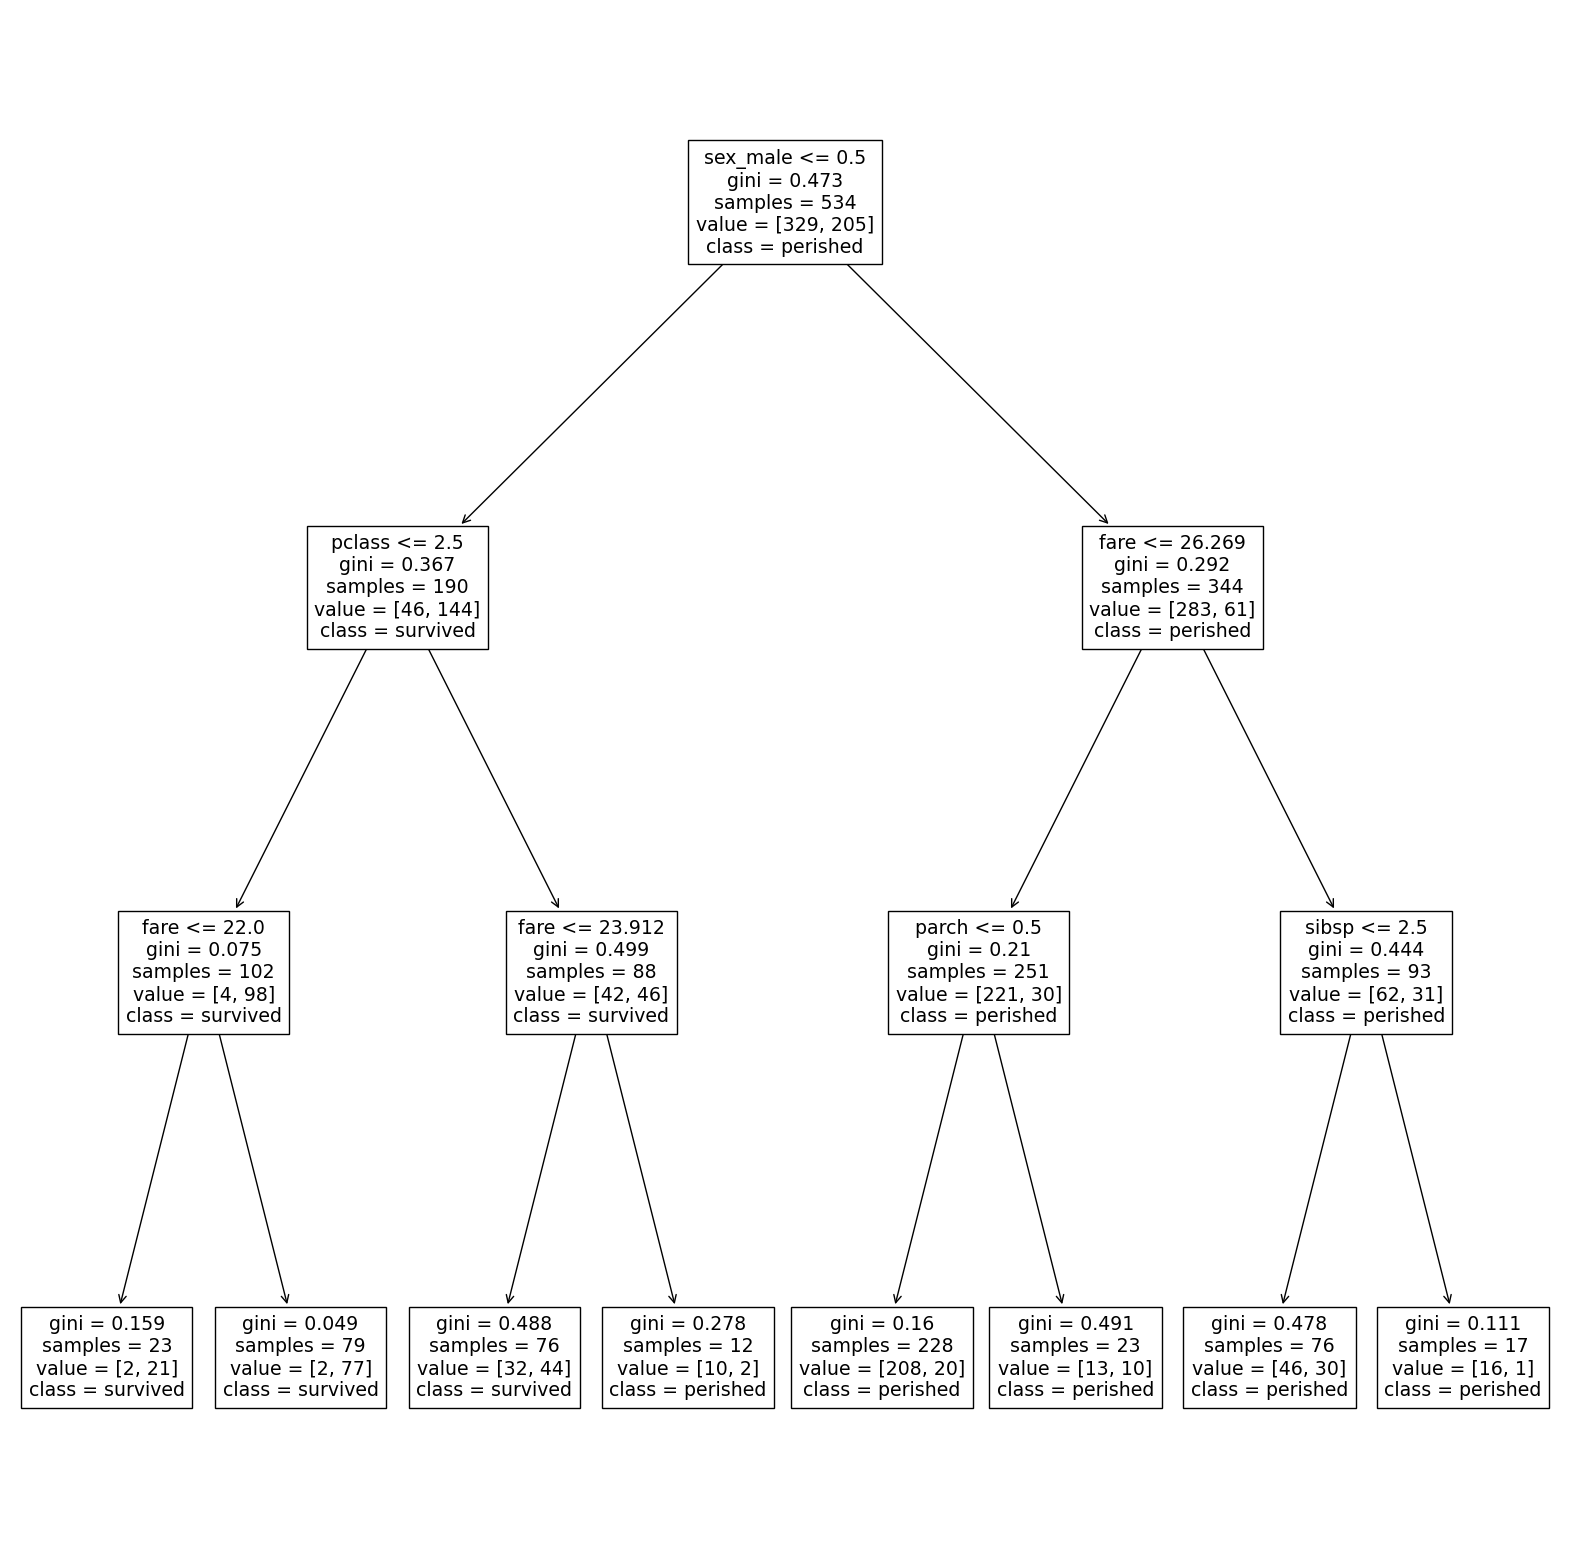

In [44]:
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=features, class_names=['perished','survived'])
plt.show()